In [1]:
import numpy as np
import scipy
from scipy import stats, signal
import matplotlib.pyplot as plt
import matplotlib
import random as r

plt.rcParams["figure.figsize"] = (15,10)

#### Problem 1

Which is more probable when rolling 2 six-sided dice: rolling snake eyes or rolling sevens? What is the ratio of the probabilities?

I predict that rolling sevens is more common, as there is only a single way for two dice to roll snake eyes, whereas there are multiple ways for them to roll seven. I expect that rolling a seven will be about 6 times as likely as rolling snake eyes.

In [2]:
snakeeyes = 0
seven = 0
for roll in range(1,100000):
    roll1 = r.randrange(1,7)
    roll2 = r.randrange(1,7)
    if(roll1 == 1 and roll2 == 2):
        snakeeyes += 1
    if(roll1+roll2 == 7):
        seven += 1

print("Snake Eyes Count: " , snakeeyes)
print("Sevens Count: ", seven)
print("Ratio P(seven)/P(Snake Eyes): ", seven/snakeeyes)

Snake Eyes Count:  2765
Sevens Count:  16732
Ratio P(seven)/P(Snake Eyes):  6.051356238698011


As we can see, the numerical ratio of sevens to snake eyes is indeed near six.

#### Problem 2

Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

Analytical solution

$$P_{A+B}(x) = \sum_z P_A(z)P_B(x-z)$$

Numerical Solution:

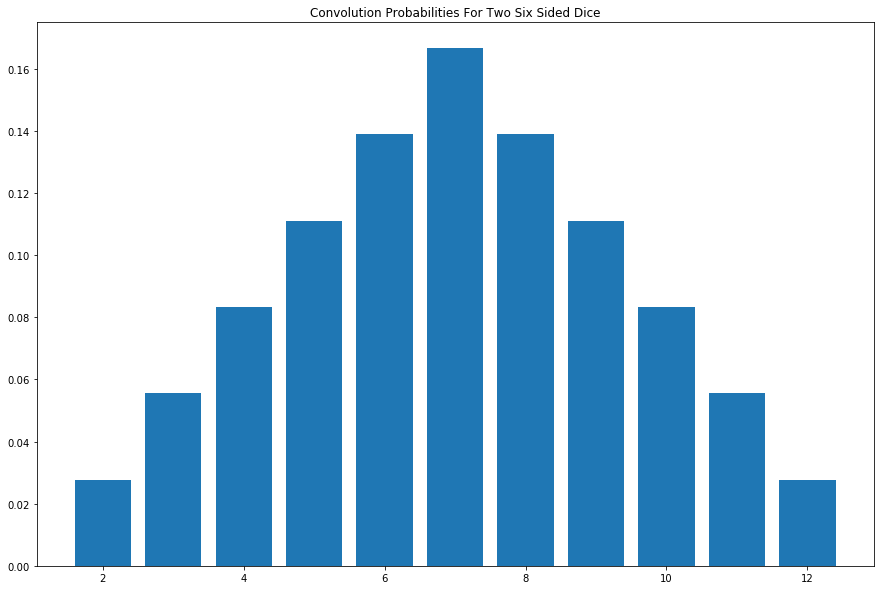

In [4]:
prob = scipy.signal.convolve([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
x = range(2,13)
plt.bar(x,prob)
plt.title('Convolution Probabilities For Two Six Sided Dice')
plt.show()

#### Problem 3

Calculate the mean and variance of the distribution in problem 2:

We choose to not use the sample variance formula, as we are looking at a distribution with fixed values and not a sample of a distribution.

In [13]:
mean = sum(prob*x)/len(x)


0.6363636363636364